Случай без использования предиктивной модели


In [18]:
from gekko import GEKKO
import numpy as np

In [19]:
# Инициализация модели
m = GEKKO(remote = False)

# Задаем временной интервал симуляции
m.time = np.linspace(0, 10, 101)

In [20]:
# Параметры из задания
K = 0.8
b = 50
m_val = 500
τ = 5
SP = 40

In [21]:
# Управляющая переменная
p = m.MV(value=0, lb=0, ub=100)
p.STATUS = 1  # разрешаем оптимизацию
p.DCOST = 0.1  # штраф за изменение скорости насоса

# Переменные состояния
v = m.Var(value=1)  # скорость 
v_desired = m.Var(value=1)  # желаемая скорость


In [22]:
# Динамика системы
m.Equation(m_val*v.dt() == -b*v + K*b*p)

# Уравнение для желаемой скорости
m.Equation(τ*v_desired.dt() + v_desired == SP)

# Минимизация функционала за счет разности фактической и желаемой скорости
m.Minimize(v - v_desired)

In [23]:
# Решение проблемы оптимизации
m.options.IMODE = 6  # Режим управления динамикой
m.solve(disp=False)  # Решаем задачу оптимизации без отображения лишней информации

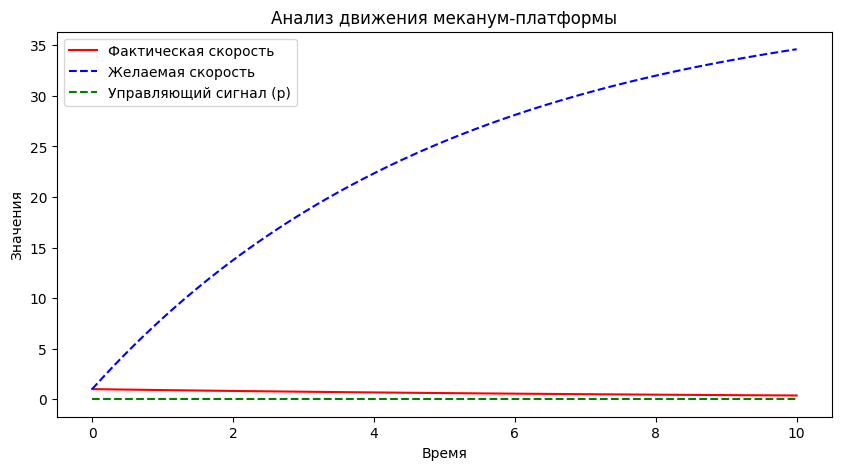

In [24]:
# Вывод результатов
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(m.time, v.value, 'r-', label='Фактическая скорость')
plt.plot(m.time, v_desired.value, 'b--', label='Желаемая скорость')
plt.plot(m.time, p.value, 'g--', label='Управляющий сигнал (p)')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значения')
plt.title('Анализ движения меканум-платформы')
plt.show()

Использование предиктивной модели


In [4]:
from gekko import GEKKO
import numpy as np
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
m = GEKKO()
m.time = np.linspace(0,10,101)

In [6]:
#Параметры
mass = 500
b = m.Param(value = 50)
K = m.Param(value = 0.8)

In [9]:
p = m.MV(value = 0, lb = 0, ub = 100)
p.STATUS = 1 #оптимизация сигнала
p.DCOST = 0.1 #штраф
p.DMAX = 20 #замедление платформы

In [10]:
v = m.CV(value=0)
v.STATUS = 1 #оптимизация скорости
m.options.CV_TYPE = 2 #кв. ошибка
v.SP = 40 #стартовое значение
v.TR_INIT = 1 #траектория
v.TAU = 5 #время

In [12]:
#процессинг модели
m.Equation(mass*v.dt() == -v*b + K*b*p)
m.options.IMODE = 6 #контроль
m.solve(disp = False)

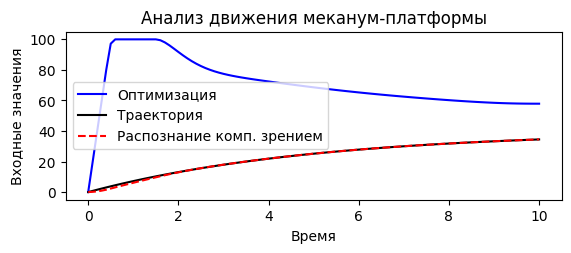

In [16]:
#получение информации
import json
with open(m.path+'//results.json') as f:
    results = json.load(f)
plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time, p.value, 'b-', label = 'Оптимизация')
plt.ylabel('Входные значения')
plt.plot(m.time,results['v1.tr'], 'k-', label = 'Траектория')
plt.plot(m.time, v.value, 'r--', label = 'Распознание комп. зрением')
plt.ylabel('Входные значения')
plt.xlabel('Время')
plt.title('Анализ движения меканум-платформы')
plt.legend(loc = 'best')
plt. savefig('analitics.png', transparent = True, dpi = 600)